In [1]:
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from numpy import zeros
from random import shuffle
from random import seed
from matplotlib import pyplot

Using TensorFlow backend.


In [0]:
'''
Read the file with the training and test data and return
it as two separate lists. Both lists will be shuffled before
they are returned.
'''
def read_lines():
    train_lines = []
    test_lines = []
    current_lines = []

    with open('SpamDetectionData.txt') as f: 
        for line in f.readlines(): 
            if line.startswith('# Test data', 0):
                train_lines = current_lines
                current_lines = test_lines
            elif line.startswith('#', 0):
                '''
                Ignore comment lines
                '''
            elif line == '\n':
                '''
                Ignore empty lines
                '''
            else:
                current_lines.append(line)

    test_lines = current_lines
    
    seed(1337)
    shuffle(train_lines)
    shuffle(test_lines)

    print('Read training lines: ', len(train_lines))
    print('Read test lines: ', len(test_lines))
  
    return train_lines, test_lines

In [0]:
'''
Take a list of lines from the original input file (train or test), remove
paragraphs and line breaks and split into label and data by using the comma 
as divider. Return as two separate lists preserving the sort order.
'''
def split_lines(lines):
    data = []
    labels = []
    maxtokens = 0
    for line in lines:
        label_part, data_part = line.replace('<p>','').replace('</p>','').replace('\n', '').split(',')
        data.append(data_part)
        labels.append(label_part)
        if (len(data_part)>maxtokens):
            maxtokens=len(data_part)

    print('maxlen ', maxtokens)
    return data, labels

In [0]:
'''
While processing the data with Keras each original text will converted
to a list of indices. These indices point to words in a dictionary
of all words contained in the training data. We convert this to a binary
matrix. The value 1 in the matrix says that a word (x in the matrix) is
contained in a given text (y in the matrix)
'''
def vectorize_sequences(sequences, dimension=4000):
    results = zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

'''
The label vectorization is quite simple:
  the value 1 is for spam,
  the value 0 is form ham
'''
def vectorize_labels(labels):
    results = zeros(len(labels))
    for i, label in enumerate(labels):
        if (label.lower() == 'spam'):
            results[i] = 1
    return results

In [0]:
def test_predict(model, testtext, expected_label):
    testtext_list = []
    testtext_list.append(testtext)
    testtext_sequence = tokenizer.texts_to_sequences(testtext_list)
    x_testtext = vectorize_sequences(testtext_sequence)
    prediction = model.predict(x_testtext)[0][0]
    
    print("Sentiment: %.3f" % prediction, 'Expected ', expected_label)

    if prediction > 0.5:
        if expected_label == 'Spam':
            return True
    else:
        if expected_label == 'Ham':
            return True
    
    return False


In [20]:
# Start script

# First split train lines from test lines
train_lines, test_lines = read_lines()

# Split data from label for each line
train_data_raw, train_labels_raw = split_lines(train_lines)
test_data_raw, test_labels_raw = split_lines(test_lines)

Read training lines:  2000
Read test lines:  100
maxlen  3691
['Spam', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Spam', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Spam', 'Ham', 'Spam', 'Spam', 'Ham', 'Ham', 'Ham', 'Spam', 'Spam', 'Ham', 'Spam', 'Spam', 'Spam', 'Spam', 'Ham', 'Spam', 'Spam', 'Ham', 'Spam', 'Spam', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Spam', 'Spam', 'Ham', 'Ham', 'Ham', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Ham', 'Spam', 'Spam', 'Spam', 'Spam', 'Ham', 'Ham', 'Ham', 'Spam', 'Spam', 'Spam', 'Ham', 'Spam', 'Spam', 'Ham', 'Ham', 'Spam', 'Spam', 'Ham', 'Spam', 'Spam', 'Spam', 'Ham', 'Spam', 'Spam', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Spam', 'Spam', 'Spam', 'Ham', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Ham', 'Spam', 'Spam', 'Spam', 'Ham', 'Spam', 'Ham', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Spam', 'Spam', 'Ham', 'Ham', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Spam', 'Spam', 'Ham', 'Ham', 'Spam', 'Spam', 'Spam', 'Ham', 'H

In [0]:
# Use Keras Tokenizer to vectorize text: 
# fit_on_texts will setup the internal vocabulary using all words
# from the training data and attaching indices to them
# texts_to_sequences will transform each text into sequence of
# integer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data_raw)
train_data_seq = tokenizer.texts_to_sequences(train_data_raw)
test_data_seq = tokenizer.texts_to_sequences(test_data_raw)


[[69, 108, 347, 749, 62, 652, 9, 29, 164, 460, 201, 110, 366, 772, 3, 5, 110, 119, 178, 4, 283, 436, 320, 66, 58, 34, 3, 30, 88, 33, 104, 28, 685, 18, 149, 149, 306, 2, 12, 401, 543, 699, 285, 2, 30, 6, 36, 12, 737, 185, 181, 48, 18, 201, 16, 174, 119, 4, 82, 283, 495, 211, 775, 7, 43, 272, 178, 3, 92, 30, 3, 16, 19, 85, 608, 639, 17, 1, 179, 7, 784, 634, 36, 16, 776, 65, 48, 43, 15, 24, 249, 84, 40, 63, 212, 85, 8, 18, 302, 744, 283, 97, 361, 133, 25, 12, 566, 50, 42, 42, 401, 4, 554, 92, 18, 256, 679, 111, 186, 110, 44, 179, 63, 78, 755, 63, 302, 14, 1, 283, 88, 68, 602, 178, 3, 296, 48, 4, 12, 6, 154, 492, 47, 1, 62, 748, 347, 3, 117, 167, 51, 374, 55, 132, 529, 3, 52, 420, 140, 19, 666, 14, 111, 470, 42, 51, 62, 29, 126, 1, 17, 296, 435, 128, 161, 678, 760, 42, 7, 101, 5, 373, 18, 126, 30, 532, 2, 144, 65, 746, 53, 2, 19, 33, 1, 694, 4, 555, 101, 165, 31, 5, 41, 31, 206, 5, 94, 42, 20, 252, 196, 783, 52, 765, 25, 68, 197, 106, 229, 357, 5, 92, 331, 65, 1, 25, 484, 1, 167, 436, 21, 

In [13]:
# Finally the integer sequenes are converted to a binary (numpy)
# matrix where rows are for the text lines, columns are for
# the words. 1 = word is inside text, 0 = word is not inside
x_train = vectorize_sequences(train_data_seq, 4000)
print('Lines of training data: ', len(x_train))
x_test = vectorize_sequences(test_data_seq, 4000)
print('Lines of test data: ', len(x_test))

Lines of training data:  2000
Lines of test data:  100


In [14]:
# The labels are also converted to a binary vector.
# 1 means spam, 0 means ham
y_train = vectorize_labels(train_labels_raw)
print('Lines of training results: ', len(y_train))
y_test = vectorize_labels(test_labels_raw)
print('Lines of test results: ', len(y_test))

Lines of training results:  2000
Lines of test results:  100


In [15]:
# Now we build the Keras model
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=8,batch_size=100,validation_split=0.5)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1000 samples, validate on 1000 samples
Epoch 1/8
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3596 - acc: 0.9520 - val_loss: 0.1481 - val_acc: 1.0000
Epoch 2/8
1000/1000 [==============================] - 0s 122us/step - loss: 0.1005 - acc: 1.0000 - val_loss: 0.0629 - val_acc: 1.0000
Epoch 3/8
1000/1000 [==============================] - 0s 125us/step - loss: 0.0462 - acc: 1.0000 - val_loss: 0.0324 - val_acc: 1.0000
Epoch 4/8
1000/1000 [==============================] - 0s 129us/step - loss: 0.0245 - acc: 1.0000 - val_loss: 0.0182 - val_acc: 1.0000
Epoch 5/8
1000/1000 [==============================] - 0s 146us/step - loss: 0.0139 - acc: 1.0000 - val_loss: 0.0108 - val_acc: 1.0000
Epoch 6/8
1000/1000 [==============================] - 0s 118us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 7/8
1000/1000 [===

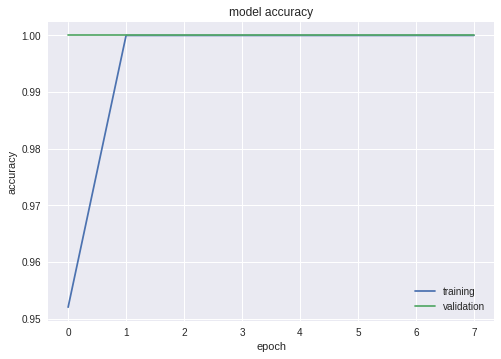

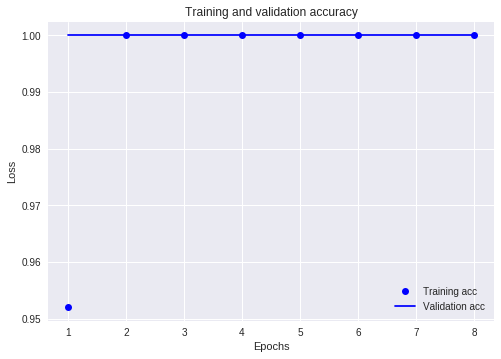

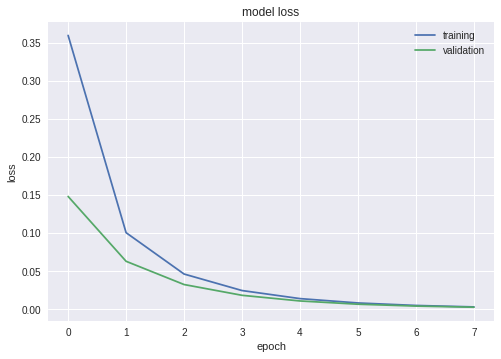

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [16]:
epochs=range(1, 9)
history_dict = history.history

# summarize history for accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['training', 'validation'], loc='lower right')
pyplot.show()

pyplot.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
pyplot.plot(epochs, acc_values, 'bo', label='Training acc')
pyplot.plot(epochs, val_acc_values, 'b', label='Validation acc')
pyplot.title('Training and validation accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

# summarize history for loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['training', 'validation'], loc='upper right')
pyplot.show()

# list all data in history
print(history.history.keys())

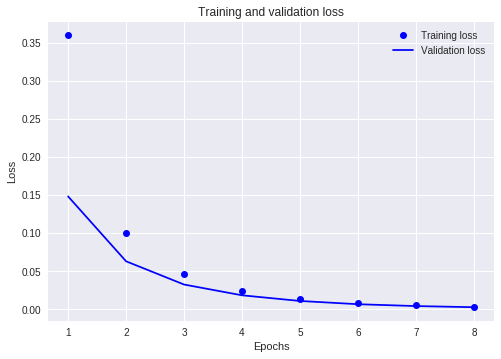

In [17]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
pyplot.plot(epochs, loss_values, 'bo', label='Training loss')
pyplot.plot(epochs, val_loss_values, 'b', label='Validation loss')
pyplot.title('Training and validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()


In [18]:
results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print('Test result: ', results)

100/100 [==============================] - 0s 179us/step
['loss', 'acc']
Test result:  [0.0007720401976257562, 1.0]


In [19]:
# Manual test over all test records
correct = 0
wrong = 0
for input_text, expected_label in zip(test_data_raw, test_labels_raw):
    if test_predict(model, input_text, expected_label):
        correct = correct + 1
    else:
        wrong = wrong + 1

print('Predictions correct ', correct, ', wrong ', wrong)

Sentiment: 0.000 Expected  Ham
Sentiment: 1.000 Expected  Spam
Sentiment: 0.004 Expected  Ham
Sentiment: 1.000 Expected  Spam
Sentiment: 1.000 Expected  Spam
Sentiment: 1.000 Expected  Spam
Sentiment: 0.000 Expected  Ham
Sentiment: 0.000 Expected  Ham
Sentiment: 0.001 Expected  Ham
Sentiment: 0.001 Expected  Ham
Sentiment: 1.000 Expected  Spam
Sentiment: 1.000 Expected  Spam
Sentiment: 0.000 Expected  Ham
Sentiment: 1.000 Expected  Spam
Sentiment: 1.000 Expected  Spam
Sentiment: 1.000 Expected  Spam
Sentiment: 1.000 Expected  Spam
Sentiment: 1.000 Expected  Spam
Sentiment: 0.999 Expected  Spam
Sentiment: 1.000 Expected  Spam
Sentiment: 0.000 Expected  Ham
Sentiment: 0.000 Expected  Ham
Sentiment: 0.005 Expected  Ham
Sentiment: 0.000 Expected  Ham
Sentiment: 0.000 Expected  Ham
Sentiment: 0.007 Expected  Ham
Sentiment: 0.000 Expected  Ham
Sentiment: 0.000 Expected  Ham
Sentiment: 0.005 Expected  Ham
Sentiment: 1.000 Expected  Spam
Sentiment: 0.000 Expected  Ham
Sentiment: 1.000 Expected